# Filling in blanks

In [3]:
import pandas as pd
import numpy as np
# import seaborn as sns
from matplotlib import pyplot as plt
import glob



In [2]:
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [57]:
def count(dataframe):
    print(np.logical_not(dataframe.isnull()).sum()[0])

### Load SCADA operational data

In [58]:
def load_SCADA_data_from_all_turbines(dir_path):
    allFiles = glob.glob(dir_path + "/*.csv")

    list_of_wt_scada_data = []
    count = 1
    for file in allFiles:
        if (count == 1):
            turbine_data = pd.read_csv(file, sep = ';')
            list_of_wt_scada_data.append(turbine_data)
            print('Loaded File: {}'.format(count))
        else:
            turbine_data = pd.read_csv(file, sep = ',', index_col=0)
            list_of_wt_scada_data.append(turbine_data)
            print('Loaded File: {}'.format(count))
        count += 1
    print('Loaded All Files.')
    return list_of_wt_scada_data

In [59]:
dir_path = './DataFromBazefield/scada_data_bessaker/'
list_of_wt_scada_data = load_SCADA_data_from_all_turbines(dir_path)

Loaded File: 1
Loaded All Files.


In [60]:

def remove_milliseconds(string):
    return string[ : string.rfind('.')]

j = 0
for dataframe in list_of_wt_scada_data:
    print(j)
    if not (j==0):
        dataframe['TimeStamp'] = dataframe['TimeStamp'].apply(lambda x:remove_milliseconds(x))
    j=j+1

0


In [61]:
list_of_wt_scada_data[0]

,TimeStamp,BESS-WTG01-WindVane (Average),BESS-WTG01-WindSpeed (Average),BESS-WTG01-RotorSpeed (Average),BESS-WTG01-NacelleDirection (Average),BESS-WTG01-ActivePower (Average),BESS-WTG01-Spinner-Temperature (Average),BESS-WTG01-Log-T-Raw-FrontBearingTemperature (Average),BESS-WTG01-Log-T-Raw-RearBearingTemperature (Average),BESS-WTG01-Log-T-Raw-BladeAPitchHeatSink (Average),...,BESS-WTG01-Log-T-Raw-Rectifier1HeatSink (Average),BESS-WTG01-Log-T-Raw-Rectifier2HeatSink (Average),BESS-WTG01-Log-T-Raw-RectifierCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-ExcitationHeatSink (Average),BESS-WTG01-Ambient-Temperature (Average),BESS-WTG01-Log-T-Raw-TowerTemperature (Average),BESS-WTG01-Log-T-Raw-ControlCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-TransformerTemperature (Average),BESS-WTG01-Average blade angle across A B C (Average),BESS-WTG01-WindDirection (Average)
0,15-07-2017 00:00:00,NaN,4.5,9.75,227.0,109.0,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN
1,15-07-2017 00:00:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15-07-2017 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15-07-2017 00:01:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15-07-2017 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,15-07-2017 00:02:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,15-07-2017 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,15-07-2017 00:03:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,15-07-2017 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,15-07-2017 00:04:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Slice each dataframe on the date where there is data

In [62]:
# This dataset is a dataset for a SINGLE wind turbine:

# Slice dataset on this row nr.: 177228 (4-09-2017 12:54:00)
#df.iloc[[177228]]

def slice_df(list_of_dataframes):
    i = 0
    for dataframe in list_of_dataframes:
        print(i)
        location = np.where(dataframe["TimeStamp"].str.contains("25-10-2017 13:20:00"))
        print(location)
        split_on_index = location[0][0]
        print(split_on_index)

        # Splitting
        df1 = dataframe.iloc[:split_on_index, :]
        df2 = dataframe.iloc[split_on_index:, :]

        # Reseting index
        df2 = df2.reset_index(drop=True)
        list_of_dataframes[i] = df2
        i+=1
        
    return list_of_dataframes

In [63]:
list_of_wt_scada_data = slice_df(list_of_wt_scada_data)
list_of_wt_scada_data[0].shape

0
(array([295360]),)
295360


(2077760, 35)

## Find index of first value in a column that is not NaN:

In [64]:
# Find the first non-NaN value in a column
def find_first_not_nan(df,column_name):
    ser = df[column_name].notnull()
    length = ser.shape[0]

    for i in range (length):
        if (ser[i] == True):
            return i
    return "no values in column!"

## Loop through all columns in the dataset and put in the first not NaN number



In [65]:
# Looping all columns in dataframe
def loop_through_and_fill_first_val(data):
    for col in data.columns:
        index = find_first_not_nan(data,col)

        if (index != 0):
          # Put the value at the found index at the first index:
            data.at[0, col] = data.at[index, col]
        
        # Dropping columns if the first value is too far in the data set
        # if (index > 200):
            # data.drop([col], axis=1,inplace = True)
    return data

In [66]:
list_of_wt_scada_data[0]

,TimeStamp,BESS-WTG01-WindVane (Average),BESS-WTG01-WindSpeed (Average),BESS-WTG01-RotorSpeed (Average),BESS-WTG01-NacelleDirection (Average),BESS-WTG01-ActivePower (Average),BESS-WTG01-Spinner-Temperature (Average),BESS-WTG01-Log-T-Raw-FrontBearingTemperature (Average),BESS-WTG01-Log-T-Raw-RearBearingTemperature (Average),BESS-WTG01-Log-T-Raw-BladeAPitchHeatSink (Average),...,BESS-WTG01-Log-T-Raw-Rectifier1HeatSink (Average),BESS-WTG01-Log-T-Raw-Rectifier2HeatSink (Average),BESS-WTG01-Log-T-Raw-RectifierCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-ExcitationHeatSink (Average),BESS-WTG01-Ambient-Temperature (Average),BESS-WTG01-Log-T-Raw-TowerTemperature (Average),BESS-WTG01-Log-T-Raw-ControlCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-TransformerTemperature (Average),BESS-WTG01-Average blade angle across A B C (Average),BESS-WTG01-WindDirection (Average)
0,25-10-2017 13:20:00,NaN,NaN,NaN,NaN,382.0,NaN,NaN,NaN,NaN,...,41.0,53.0,36.0,47.0,NaN,23.0,NaN,NaN,NaN,NaN
1,25-10-2017 13:20:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25-10-2017 13:21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.0,57.0,NaN,48.0,NaN,NaN,NaN,57.0,NaN,NaN
3,25-10-2017 13:21:30,NaN,6.4,13.679999,NaN,361.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25-10-2017 13:22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.0,59.0,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN
5,25-10-2017 13:22:30,NaN,6.7,14.360000,NaN,423.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,25-10-2017 13:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,25-10-2017 13:23:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,25-10-2017 13:24:00,NaN,8.0,14.120000,NaN,369.0,NaN,NaN,NaN,24.0,...,41.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,25-10-2017 13:24:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
def df_to_latex(dataframe ):
    text =  dataframe.to_latex(index=False)
    
    print()
    print(text)


# Printing the 5 first columns and 5 first rows for the thesis
def head_row_col(dataframe):
    print_df = dataframe.head().iloc[:,[0,1,2,3,4,5]].copy()
    print_df["..."]="..."
    return print_df

# The scaled set looks like this
df_to_latex(head_row_col(list_of_wt_scada_data[0]))


\begin{tabular}{lrrrrrl}
\toprule
           TimeStamp &  BESS-WTG01-WindVane (Average) &  BESS-WTG01-WindSpeed (Average) &  BESS-WTG01-RotorSpeed (Average) &  BESS-WTG01-NacelleDirection (Average) &  BESS-WTG01-ActivePower (Average) &  ... \\
\midrule
 25-10-2017 13:20:00 &                            NaN &                             NaN &                              NaN &                                    NaN &                             382.0 &  ... \\
 25-10-2017 13:20:30 &                            NaN &                             NaN &                              NaN &                                    NaN &                               NaN &  ... \\
 25-10-2017 13:21:00 &                            NaN &                             NaN &                              NaN &                                    NaN &                               NaN &  ... \\
 25-10-2017 13:21:30 &                            NaN &                             6.4 &                        13.

In [68]:
i = 0
for dataframe in list_of_wt_scada_data:
    print(i)
    dataframe = loop_through_and_fill_first_val(dataframe)
    list_of_wt_scada_data[i] = dataframe
    i += 1

list_of_wt_scada_data[0].head()

0


,TimeStamp,BESS-WTG01-WindVane (Average),BESS-WTG01-WindSpeed (Average),BESS-WTG01-RotorSpeed (Average),BESS-WTG01-NacelleDirection (Average),BESS-WTG01-ActivePower (Average),BESS-WTG01-Spinner-Temperature (Average),BESS-WTG01-Log-T-Raw-FrontBearingTemperature (Average),BESS-WTG01-Log-T-Raw-RearBearingTemperature (Average),BESS-WTG01-Log-T-Raw-BladeAPitchHeatSink (Average),...,BESS-WTG01-Log-T-Raw-Rectifier1HeatSink (Average),BESS-WTG01-Log-T-Raw-Rectifier2HeatSink (Average),BESS-WTG01-Log-T-Raw-RectifierCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-ExcitationHeatSink (Average),BESS-WTG01-Ambient-Temperature (Average),BESS-WTG01-Log-T-Raw-TowerTemperature (Average),BESS-WTG01-Log-T-Raw-ControlCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-TransformerTemperature (Average),BESS-WTG01-Average blade angle across A B C (Average),BESS-WTG01-WindDirection (Average)
0,25-10-2017 13:20:00,-9.1,6.4,13.679999,163.0,382.0,20.0,35.0,27.0,24.0,...,41.0,53.0,36.0,47.0,9.0,23.0,29.0,57.0,2.72,161.100006
1,25-10-2017 13:20:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25-10-2017 13:21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.0,57.0,NaN,48.0,NaN,NaN,NaN,57.0,NaN,NaN
3,25-10-2017 13:21:30,NaN,6.4,13.679999,NaN,361.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25-10-2017 13:22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.0,59.0,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# The scaled set looks like this
df_to_latex(head_row_col(list_of_wt_scada_data[0]))


\begin{tabular}{lrrrrrl}
\toprule
           TimeStamp &  BESS-WTG01-WindVane (Average) &  BESS-WTG01-WindSpeed (Average) &  BESS-WTG01-RotorSpeed (Average) &  BESS-WTG01-NacelleDirection (Average) &  BESS-WTG01-ActivePower (Average) &  ... \\
\midrule
 25-10-2017 13:20:00 &                           -9.1 &                             6.4 &                        13.679999 &                                  163.0 &                             382.0 &  ... \\
 25-10-2017 13:20:30 &                            NaN &                             NaN &                              NaN &                                    NaN &                               NaN &  ... \\
 25-10-2017 13:21:00 &                            NaN &                             NaN &                              NaN &                                    NaN &                               NaN &  ... \\
 25-10-2017 13:21:30 &                            NaN &                             6.4 &                        13.

### Filling all missing values

In [70]:
def fill_missing_values(dataframe):
    # Filling in the missing values:
    dataframe.fillna(method='ffill', inplace=True)
    return dataframe

In [71]:
i = 0
for dataframe in list_of_wt_scada_data:
    print('Filling in dataframe: {}'.format(i))
    dataframe = fill_missing_values(dataframe)
    list_of_wt_scada_data[i] = dataframe
    i += 1
for col in list_of_wt_scada_data[0].head().columns:
    if (len(col.split('BESS-WTG01-')) > 1):
        print((col.split('BESS-WTG01-')[1]).split("(Average)")[0])

Filling in dataframe: 0
WindVane 
WindSpeed 
RotorSpeed 
NacelleDirection 
ActivePower 
Spinner-Temperature 
Log-T-Raw-FrontBearingTemperature 
Log-T-Raw-RearBearingTemperature 
Log-T-Raw-BladeAPitchHeatSink 
Log-T-Raw-BladeBPitchHeatSink 
Log-T-Raw-BladeCPitchHeatSink 
Log-T-Raw-BladeAPitchControlBox 
Log-T-Raw-BladeBPitchControlBox 
Log-T-Raw-BladeCPitchControlBox 
Log-T-Raw-BladeATemperature 
Log-T-Raw-BladeBTemperature 
Log-T-Raw-BladeCTemperature 
Log-T-Raw-Rotor1Temperature 
Log-T-Raw-Rotor2Temperature 
Log-T-Raw-Stator2Temperature 
Log-T-Raw-Stator1Temperature 
Log-T-Raw-NacelleAmbientTemperature 
Nacelle-Temperature 
Log-T-Raw-NacelleControlCabinetTemperature 
Log-T-Raw-Rectifier1HeatSink 
Log-T-Raw-Rectifier2HeatSink 
Log-T-Raw-RectifierCabinetTemperature 
Log-T-Raw-ExcitationHeatSink 
Ambient-Temperature 
Log-T-Raw-TowerTemperature 
Log-T-Raw-ControlCabinetTemperature 
Log-T-Raw-TransformerTemperature 
Average blade angle across A B C 
WindDirection 


In [72]:
'''def remove_microseconds(dt):
    return dt.replace(microsecond=0)


dataframe['TimeStamp'] = pd.to_datetime(dataframe['TimeStamp'])
# dataframe['TimeStamp'] = dataframe['TimeStamp'].apply(lambda x: remove_microseconds(x)) 


# dataframe['TimeStamp'] = pd.to_datetime(dataframe['TimeStamp'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%d-%m-%Y %H:%M:%S.%F')
dataframe

'''

"def remove_microseconds(dt):\n    return dt.replace(microsecond=0)\n\n\ndataframe['TimeStamp'] = pd.to_datetime(dataframe['TimeStamp'])\n# dataframe['TimeStamp'] = dataframe['TimeStamp'].apply(lambda x: remove_microseconds(x)) \n\n\n# dataframe['TimeStamp'] = pd.to_datetime(dataframe['TimeStamp'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%d-%m-%Y %H:%M:%S.%F')\ndataframe\n\n"

In [73]:
'''
def remove_microseconds(dt):
    return dt.replace(microsecond=0)

for dataframe in list_of_wt_scada_data:
    dataframe['TimeStamp'] = pd.to_datetime(dataframe['TimeStamp'])
    # dataframe['TimeStamp'] = dataframe['TimeStamp'].apply(lambda x: remove_microseconds(x)) 


# dataframe['TimeStamp'] = pd.to_datetime(dataframe['TimeStamp'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%d-%m-%Y %H:%M:%S.%F')
dataframe

'''

"\ndef remove_microseconds(dt):\n    return dt.replace(microsecond=0)\n\nfor dataframe in list_of_wt_scada_data:\n    dataframe['TimeStamp'] = pd.to_datetime(dataframe['TimeStamp'])\n    # dataframe['TimeStamp'] = dataframe['TimeStamp'].apply(lambda x: remove_microseconds(x)) \n\n\n# dataframe['TimeStamp'] = pd.to_datetime(dataframe['TimeStamp'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%d-%m-%Y %H:%M:%S.%F')\ndataframe\n\n"

In [74]:
list_of_wt_scada_data[0]

,TimeStamp,BESS-WTG01-WindVane (Average),BESS-WTG01-WindSpeed (Average),BESS-WTG01-RotorSpeed (Average),BESS-WTG01-NacelleDirection (Average),BESS-WTG01-ActivePower (Average),BESS-WTG01-Spinner-Temperature (Average),BESS-WTG01-Log-T-Raw-FrontBearingTemperature (Average),BESS-WTG01-Log-T-Raw-RearBearingTemperature (Average),BESS-WTG01-Log-T-Raw-BladeAPitchHeatSink (Average),...,BESS-WTG01-Log-T-Raw-Rectifier1HeatSink (Average),BESS-WTG01-Log-T-Raw-Rectifier2HeatSink (Average),BESS-WTG01-Log-T-Raw-RectifierCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-ExcitationHeatSink (Average),BESS-WTG01-Ambient-Temperature (Average),BESS-WTG01-Log-T-Raw-TowerTemperature (Average),BESS-WTG01-Log-T-Raw-ControlCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-TransformerTemperature (Average),BESS-WTG01-Average blade angle across A B C (Average),BESS-WTG01-WindDirection (Average)
0,25-10-2017 13:20:00,-9.1,6.4,13.679999,163.0,382.0,20.0,35.0,27.0,24.0,...,41.0,53.0,36.0,47.0,9.0,23.0,29.0,57.0,2.72,161.100006
1,25-10-2017 13:20:30,-9.1,6.4,13.679999,163.0,382.0,20.0,35.0,27.0,24.0,...,41.0,53.0,36.0,47.0,9.0,23.0,29.0,57.0,2.72,161.100006
2,25-10-2017 13:21:00,-9.1,6.4,13.679999,163.0,382.0,20.0,35.0,27.0,24.0,...,43.0,57.0,36.0,48.0,9.0,23.0,29.0,57.0,2.72,161.100006
3,25-10-2017 13:21:30,-9.1,6.4,13.679999,163.0,361.0,20.0,35.0,27.0,24.0,...,43.0,57.0,36.0,48.0,9.0,23.0,29.0,57.0,2.72,161.100006
4,25-10-2017 13:22:00,-9.1,6.4,13.679999,163.0,361.0,20.0,35.0,27.0,24.0,...,46.0,59.0,36.0,49.0,9.0,23.0,29.0,57.0,2.72,161.100006
5,25-10-2017 13:22:30,-9.1,6.7,14.360000,163.0,423.0,20.0,35.0,27.0,24.0,...,46.0,59.0,36.0,49.0,9.0,23.0,29.0,57.0,2.72,161.100006
6,25-10-2017 13:23:00,-9.1,6.7,14.360000,163.0,423.0,20.0,35.0,27.0,24.0,...,44.0,55.0,36.0,49.0,9.0,23.0,29.0,57.0,2.72,161.100006
7,25-10-2017 13:23:30,-9.1,6.7,14.360000,163.0,423.0,20.0,35.0,27.0,24.0,...,44.0,55.0,36.0,49.0,9.0,23.0,29.0,57.0,2.72,161.100006
8,25-10-2017 13:24:00,-9.1,8.0,14.120000,163.0,369.0,20.0,35.0,27.0,24.0,...,41.0,50.0,36.0,49.0,9.0,23.0,29.0,57.0,2.72,161.100006
9,25-10-2017 13:24:30,-9.1,8.0,14.120000,163.0,369.0,20.0,35.0,27.0,24.0,...,41.0,50.0,36.0,49.0,9.0,23.0,29.0,57.0,2.72,161.100006


In [75]:
# The scaled set looks like this
df_to_latex(head_row_col(list_of_wt_scada_data[0]))


\begin{tabular}{lrrrrrl}
\toprule
           TimeStamp &  BESS-WTG01-WindVane (Average) &  BESS-WTG01-WindSpeed (Average) &  BESS-WTG01-RotorSpeed (Average) &  BESS-WTG01-NacelleDirection (Average) &  BESS-WTG01-ActivePower (Average) &  ... \\
\midrule
 25-10-2017 13:20:00 &                           -9.1 &                             6.4 &                        13.679999 &                                  163.0 &                             382.0 &  ... \\
 25-10-2017 13:20:30 &                           -9.1 &                             6.4 &                        13.679999 &                                  163.0 &                             382.0 &  ... \\
 25-10-2017 13:21:00 &                           -9.1 &                             6.4 &                        13.679999 &                                  163.0 &                             382.0 &  ... \\
 25-10-2017 13:21:30 &                           -9.1 &                             6.4 &                        13.

# The Error log

### Reading the data for WT01

In [6]:
import pandas as pd
df_log = pd.read_excel('./DataFromBazefield/AlarmlogBessaker.xlsx')

#### Splitting the error log into each WT

In [7]:
def split_errors_on_wt(error_log):
    individual_turbine_alarm = {}
    for i in range(25):
        if(i+1 < 10):
            individual_turbine_alarm[i+1] = error_log.loc[error_log['Turbine'] == 'BESS-WTG0{0}'.format(i+1)]
        else :
            individual_turbine_alarm[i+1] = error_log.loc[error_log['Turbine'] == 'BESS-WTG{0}'.format(i+1)]

        individual_turbine_alarm[i+1] = individual_turbine_alarm[i+1].reset_index(drop=True)
    return individual_turbine_alarm

In [8]:
error_dict = split_errors_on_wt(df_log)

# List with 25 elements containing the dataframe of each of the 25 wind turbines at Bessaker
error_list = [*error_dict.values()]
len(error_list)

25

### Removing errors older than "25-10-2017 13:20:00"

In [9]:
from datetime import date

for error_df in error_list:
    error_df["Start"] = pd.to_datetime(error_df['Start'])
    error_df.head()
    error_df = error_df[(error_df.Start >= date(2017, 10, 25))]

error_list[0].head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


,Site,Turbine,Alarm,Code,Event Type,Description,Start,End,Duration,Type,Unnamed: 10
0,Bessaker,BESS-WTG01,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),2019-10-06 14:56:33,2019-10-06 15:06:51,00:10:18,Alarm,NaN
1,Bessaker,BESS-WTG01,Status_240_Substatus_0,240:0,A,R 240:0 STATUS: Remote control PC (switched on),2019-10-02 12:26:37,2019-10-02 12:26:43,00:00:06,Alarm,NaN
2,Bessaker,BESS-WTG01,Status_240_Substatus_1,240:1,A,R 240:1 STATUS: Remote control PC (switched off),2019-10-02 12:24:29,2019-10-02 12:26:37,00:02:08,Alarm,NaN
3,Bessaker,BESS-WTG01,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),2019-10-02 10:01:04,2019-10-02 10:06:16,00:05:12,Alarm,NaN
4,Bessaker,BESS-WTG01,Status_17_Substatus_0,0.708333,A,N 17:0 Test safety system - (Test safety sys...,2019-10-02 10:00:04,2019-10-02 10:01:04,00:01:00,Alarm,NaN


### Formatting the dates in the error data

In [10]:
# What I have: format='%Y-%m-%d %H:%M:%S').
# What I want: '%d-%m-%Y %H:%M:%S'

def format_dates(dataframe):
    dataframe['Start'] = pd.to_datetime(dataframe['Start'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%d-%m-%Y %H:%M:%S')
    dataframe['End'] = pd.to_datetime(dataframe['End'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%d-%m-%Y %H:%M:%S')
    return dataframe

In [11]:
wt = 0
for error_df in error_list:
    error_df = format_dates(error_df)
    wt += 1
error_list[3].head()

,Site,Turbine,Alarm,Code,Event Type,Description,Start,End,Duration,Type,Unnamed: 10
0,Bessaker,BESS-WTG04,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),06-10-2019 19:08:30,06-10-2019 20:28:48,01:20:18,Alarm,
1,Bessaker,BESS-WTG04,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),06-10-2019 14:54:17,06-10-2019 15:12:16,00:17:59,Alarm,NaN
2,Bessaker,BESS-WTG04,Status_240_Substatus_0,240:0,A,R 240:0 STATUS: Remote control PC (switched on),02-10-2019 12:26:37,02-10-2019 12:26:44,00:00:07,Alarm,NaN
3,Bessaker,BESS-WTG04,Status_240_Substatus_1,240:1,A,R 240:1 STATUS: Remote control PC (switched off),02-10-2019 12:24:29,02-10-2019 12:26:37,00:02:08,Alarm,NaN
4,Bessaker,BESS-WTG04,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),30-09-2019 15:06:49,30-09-2019 15:43:58,00:37:09,Alarm,NaN


### Filtering the wanted errors

In [12]:
'''
Error descriptions:

    "Status_9_Substatus_8" = Generator heating - (Manual)
    "Status_62_Substatus_7" = Feeding fault - (Diff. P-set/P-actual)
    "Status_15_Substatus_1" = Turbine moist - (Turbine moist Inverter 1)
    "Status_62_Substatus_30" = Feeding fault - (Feeding safety circuit faulty)
 
    '''
selected_errors = [
    "Status_9_Substatus_8",
    "Status_62_Substatus_7",
    "Status_62_Substatus_30"
]

def remove_unnecessary_faults(dataframe):
    new_df = pd.DataFrame(columns=dataframe.columns)

    for fault in selected_errors:
        new_df = new_df.append(dataframe[ dataframe["Alarm"] == fault])
    return new_df

j = 0
for error_df in error_list:
    error_df = remove_unnecessary_faults(error_df)
    error_df.sort_values(by=['Start'], inplace = True)
    error_df.reset_index(drop=True)
    error_list[j] = error_df
    j+=1

### Plotting the frequency of the chosen faults for Bessaker WT 1-25

In [13]:
# Empty dataframe
import numpy as np

def status_to_description(y):
    statusToDescription = {
        'Other'                 : 'Other',
        'Status_9_Substatus_8'  : 'Generator heating - (Manual)',
        'Status_62_Substatus_7' : 'Feeding fault - (Diff. P-set/P-actual)',
        'Status_62_Substatus_30': 'Feeding fault - (Feeding safety circuit faulty)'
    }
    y = np.array([statusToDescription[x] for x in y])
    #y['Status'] = y['Status'].map(statusToDescription)
    return y

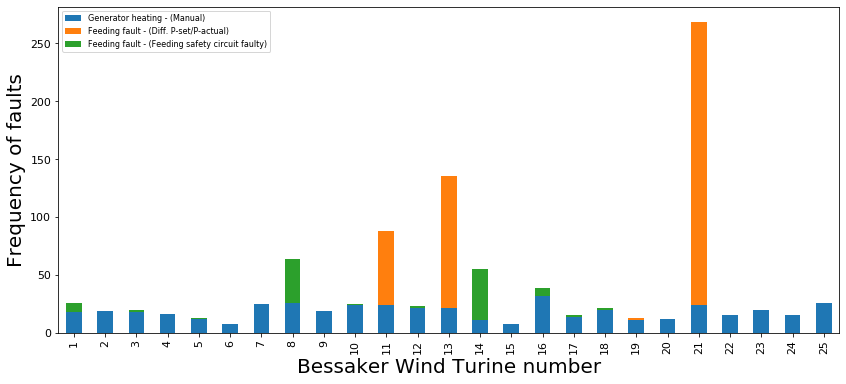

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

plot_df = pd.DataFrame(np.zeros((25, len(selected_errors))),columns = selected_errors)
# Filling in the count for the faults for every of the 25 WT
index = 0

list_wt = list(range(1, 25))

# Filling in the dataframe that is to be plotted
for error_df in error_list:
    ser = error_df["Alarm"].value_counts()
    for i in range(len(ser.index)):
        col = ser.index[i]
        plot_df.at[index,col] = ser.values[i]
    index += 1
    

plot_df.astype(int)
# print(plot_df)
plot_df.index += 1
plot_df.columns = status_to_description(plot_df.columns)

# plotting 
fig, ax = plt.subplots(1, 1, figsize=(14,6))

ax.set_xlabel("Bessaker Wind Turine number",fontsize=20)
ax.set_ylabel("Frequency of faults",fontsize=20)

plt.tick_params(axis='y')
plot_df.plot.bar(ax=ax,width=0.5,stacked = True,fontsize = 11)

fig.savefig('./Data_Plots/errors/alarm_freq.png')


In [15]:
plot_df

,Generator heating - (Manual),Feeding fault - (Diff. P-set/P-actual),Feeding fault - (Feeding safety circuit faulty)
1,18.0,0.0,8.0
2,19.0,0.0,0.0
3,18.0,0.0,2.0
4,16.0,0.0,0.0
5,12.0,0.0,1.0
6,8.0,0.0,0.0
7,25.0,0.0,0.0
8,26.0,0.0,38.0
9,19.0,0.0,0.0
10,24.0,0.0,1.0


### Rounding the error log timestamps to match with the SCADA time stamps

In [27]:
from datetime import datetime, timedelta

def ceil_dt(dt, delta):
    return dt + (datetime.min - dt) % delta

def floor_dt(dt):
    return dt.replace(second = 0)


# For flooring starting times for an error
def floor_timestamp_start(timestamp_error_start):
    timestamp_error_start = datetime.strptime(timestamp_error_start,'%d-%m-%Y %H:%M:%S')

    # print("timestamp_error:", timestamp_error_start)
    
    timestamp_error_start = floor_dt(timestamp_error_start)
    return timestamp_error_start
    
# For ceiling ending times for an error UP
def ceil_timestamp_end(timestamp_error_end):
    timestamp_error_end = datetime.strptime(timestamp_error_end,'%d-%m-%Y %H:%M:%S')

    # print("timestamp_error:", timestamp_error_end)

    timestamp_error_end = ceil_dt(timestamp_error_end,timedelta(seconds = 30))
    return timestamp_error_end


In [28]:
start_time = error_list[0]['Start'].iloc[24]
end_time = error_list[0]['End'].iloc[24]
print(start_time)
print(end_time)

29-01-2018 09:42:34
29-01-2018 14:38:04


In [29]:
floor_timestamp_start(start_time)
print(start_time)

29-01-2018 09:42:34


In [30]:
ceil = ceil_timestamp_end(end_time)
print(ceil)

2018-01-29 14:38:30


### Round the errors times in error_list:


In [31]:
for error_df in error_list:
    error_df['Start'] = error_df['Start'].apply(lambda x:floor_timestamp_start(x))
    error_df['End'] = error_df['End'].apply(lambda x: ceil_timestamp_end(x))

    error_df['Start'] = pd.to_datetime(error_df['Start'], format='%d-%m-%Y %H:%M:%S').dt.strftime('%d-%m-%Y %H:%M:%S')
    error_df['End'] = pd.to_datetime(error_df['End'], format='%d-%m-%Y %H:%M:%S').dt.strftime('%d-%m-%Y %H:%M:%S')
error_list[24].head()

,Site,Turbine,Alarm,Code,Event Type,Description,Start,End,Duration,Type,Unnamed: 10
146,Bessaker,BESS-WTG25,Status_9_Substatus_8,0.380556,A,N 9:8 Generator heating - (Manual),05-07-2019 17:02:00,05-07-2019 21:19:30,04:16:51,Alarm,NaN
92,Bessaker,BESS-WTG25,Status_9_Substatus_8,0.380556,A,N 9:8 Generator heating - (Manual),09-08-2019 17:20:00,09-08-2019 18:07:30,00:47:07,Alarm,NaN
463,Bessaker,BESS-WTG25,Status_9_Substatus_8,0.380556,A,N 9:8 Generator heating - (Manual),14-12-2018 22:41:00,15-12-2018 02:30:30,03:48:38,Alarm,NaN
301,Bessaker,BESS-WTG25,Status_9_Substatus_8,0.380556,A,N 9:8 Generator heating - (Manual),15-02-2019 13:11:00,15-02-2019 21:14:00,08:02:43,Alarm,NaN
211,Bessaker,BESS-WTG25,Status_9_Substatus_8,0.380556,A,N 9:8 Generator heating - (Manual),15-05-2019 04:09:00,15-05-2019 08:17:30,04:07:38,Alarm,NaN


### Inserting new column with "Other" as value in SCADA dataset

In [32]:
i = 0
for dataframe in list_of_wt_scada_data:
    dataframe['Status'] = "Other"
    list_of_wt_scada_data[i] = dataframe
list_of_wt_scada_data[0].head()

,TimeStamp,BESS-WTG25-WindVane (Average),BESS-WTG25-WindSpeed (Average),BESS-WTG25-RotorSpeed (Average),BESS-WTG25-NacelleDirection (Average),BESS-WTG25-ActivePower (Average),BESS-WTG25-Spinner-Temperature (Average),BESS-WTG25-Log-T-Raw-FrontBearingTemperature (Average),BESS-WTG25-Log-T-Raw-RearBearingTemperature (Average),BESS-WTG25-Log-T-Raw-BladeAPitchHeatSink (Average),...,BESS-WTG25-Log-T-Raw-Rectifier2HeatSink (Average),BESS-WTG25-Log-T-Raw-RectifierCabinetTemperature (Average),BESS-WTG25-Log-T-Raw-ExcitationHeatSink (Average),BESS-WTG25-Ambient-Temperature (Average),BESS-WTG25-Log-T-Raw-TowerTemperature (Average),BESS-WTG25-Log-T-Raw-ControlCabinetTemperature (Average),BESS-WTG25-Log-T-Raw-TransformerTemperature (Average),BESS-WTG25-Average blade angle across A B C (Average),BESS-WTG25-WindDirection (Average),Status
0,25-10-2017 13:20:00,-9.1,10.7,0.93,262.0,210.0,14.0,21.0,18.0,21.0,...,12.0,20.0,12.0,8.0,11.0,17.0,31.0,92.010002,202.5,Other
1,25-10-2017 13:20:30,-9.1,10.7,0.93,262.0,210.0,14.0,21.0,18.0,21.0,...,12.0,20.0,12.0,8.0,11.0,17.0,31.0,92.010002,202.5,Other
2,25-10-2017 13:21:00,-9.1,11.7,0.93,262.0,210.0,14.0,21.0,18.0,21.0,...,12.0,20.0,12.0,8.0,11.0,17.0,31.0,92.010002,202.5,Other
3,25-10-2017 13:21:30,-9.1,11.7,0.93,262.0,210.0,14.0,21.0,18.0,21.0,...,12.0,20.0,12.0,8.0,11.0,17.0,31.0,92.010002,202.5,Other
4,25-10-2017 13:22:00,-9.1,11.7,0.93,262.0,210.0,14.0,21.0,18.0,21.0,...,12.0,20.0,12.0,8.0,11.0,17.0,31.0,92.010002,202.5,Other


In [33]:
list_of_wt_scada_data[0].head()

,TimeStamp,BESS-WTG25-WindVane (Average),BESS-WTG25-WindSpeed (Average),BESS-WTG25-RotorSpeed (Average),BESS-WTG25-NacelleDirection (Average),BESS-WTG25-ActivePower (Average),BESS-WTG25-Spinner-Temperature (Average),BESS-WTG25-Log-T-Raw-FrontBearingTemperature (Average),BESS-WTG25-Log-T-Raw-RearBearingTemperature (Average),BESS-WTG25-Log-T-Raw-BladeAPitchHeatSink (Average),...,BESS-WTG25-Log-T-Raw-Rectifier2HeatSink (Average),BESS-WTG25-Log-T-Raw-RectifierCabinetTemperature (Average),BESS-WTG25-Log-T-Raw-ExcitationHeatSink (Average),BESS-WTG25-Ambient-Temperature (Average),BESS-WTG25-Log-T-Raw-TowerTemperature (Average),BESS-WTG25-Log-T-Raw-ControlCabinetTemperature (Average),BESS-WTG25-Log-T-Raw-TransformerTemperature (Average),BESS-WTG25-Average blade angle across A B C (Average),BESS-WTG25-WindDirection (Average),Status
0,25-10-2017 13:20:00,-9.1,10.7,0.93,262.0,210.0,14.0,21.0,18.0,21.0,...,12.0,20.0,12.0,8.0,11.0,17.0,31.0,92.010002,202.5,Other
1,25-10-2017 13:20:30,-9.1,10.7,0.93,262.0,210.0,14.0,21.0,18.0,21.0,...,12.0,20.0,12.0,8.0,11.0,17.0,31.0,92.010002,202.5,Other
2,25-10-2017 13:21:00,-9.1,11.7,0.93,262.0,210.0,14.0,21.0,18.0,21.0,...,12.0,20.0,12.0,8.0,11.0,17.0,31.0,92.010002,202.5,Other
3,25-10-2017 13:21:30,-9.1,11.7,0.93,262.0,210.0,14.0,21.0,18.0,21.0,...,12.0,20.0,12.0,8.0,11.0,17.0,31.0,92.010002,202.5,Other
4,25-10-2017 13:22:00,-9.1,11.7,0.93,262.0,210.0,14.0,21.0,18.0,21.0,...,12.0,20.0,12.0,8.0,11.0,17.0,31.0,92.010002,202.5,Other


## Testing:

In [34]:
def remove_microseconds(dt):
    return dt.replace(microsecond=0)


df_scada = list_of_wt_scada_data[0]

df_log = error_list[0]
start = df_log.iloc[0]["Start"]
print(start)

# df_scada['TimeStamp'] = pd.to_datetime(df_scada['TimeStamp'])
# dataframe['TimeStamp'] = dataframe['TimeStamp'].apply(lambda x: remove_microseconds(x)) 




# Should not cause an error:
start_index_for_error_in_SCADA = df_scada.index[df_scada['TimeStamp'] == start].tolist()[0]
print(start_index_for_error_in_SCADA)


01-10-2019 09:27:00
2032814


### Alarm list for WT01:

In [35]:
error_list[0]["Alarm"]

7        Status_9_Substatus_8
6      Status_62_Substatus_30
408    Status_62_Substatus_30
595    Status_62_Substatus_30
645      Status_9_Substatus_8
509      Status_9_Substatus_8
271      Status_9_Substatus_8
269      Status_9_Substatus_8
267      Status_9_Substatus_8
585    Status_62_Substatus_30
583    Status_62_Substatus_30
160      Status_9_Substatus_8
265      Status_9_Substatus_8
263      Status_9_Substatus_8
546    Status_62_Substatus_30
245      Status_9_Substatus_8
420      Status_9_Substatus_8
113      Status_9_Substatus_8
216      Status_9_Substatus_8
314    Status_62_Substatus_30
42     Status_62_Substatus_30
29       Status_9_Substatus_8
57       Status_9_Substatus_8
278      Status_9_Substatus_8
565      Status_9_Substatus_8
562      Status_9_Substatus_8
Name: Alarm, dtype: object

### Filling in labels from the error data to the SCADA data

In [36]:
def fill_in_labels_in_SCADA(df_scada, df_error_log):
    # Looping through the errors in the error_log
    for j in range(df_error_log.shape[0]):
        
        # The error information:
        start = df_error_log.iloc[j]["Start"]
        end = df_error_log.iloc[j]["End"]
        label = df_error_log.iloc[j]["Alarm"]
        print(label)
        
        try: 
            start_index_for_error_in_SCADA = df_scada.index[df_scada['TimeStamp'] == start].tolist()[0]
            end_index_for_error_in_SCADA = df_scada.index[df_scada['TimeStamp'] == end].tolist()[0]

            count = 0
            # Filling in labels for data points in range
            for i in range(start_index_for_error_in_SCADA, end_index_for_error_in_SCADA + 1 ):
                count +=1
                df_scada.at[i,'Status'] = label
            print("Number of datapoints changed in the SCADA data: ", count)
        except:
            print("the", start, "for", label, "was too early for the SCADA data")
    return df_scada

In [37]:
# Filling in all labels in the SCADA data:
wt_index = 0
for dataframe in list_of_wt_scada_data:
    df_log = error_list[wt_index]
    dataframe = fill_in_labels_in_SCADA(dataframe, df_log)
    wt_index += 1

Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  734
Status_62_Substatus_30
Number of datapoints changed in the SCADA data:  3
Status_62_Substatus_30
Number of datapoints changed in the SCADA data:  2
Status_62_Substatus_30
Number of datapoints changed in the SCADA data:  2
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  765
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  128
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  191
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  463
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  326
Status_62_Substatus_30
Number of datapoints changed in the SCADA data:  4
Status_62_Substatus_30
Number of datapoints changed in the SCADA data:  2
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  490
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  226
Status_9_Substatus_8
Number of datapoi

Number of datapoints changed in the SCADA data:  110
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  488
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  487
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  492
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  65
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  32
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  240
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  278
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  480
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  662
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  201
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  1090
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  1107
Status_9_Substatus_8
Number of datapoints changed in the SC

Number of datapoints changed in the SCADA data:  812
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  367
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  131
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  351
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  364
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  1065
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  267
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  894
Status_62_Substatus_30
Number of datapoints changed in the SCADA data:  2
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  369
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  970
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  63
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  172
Status_9_Substatus_8
Number of datapoints changed in the SC

Number of datapoints changed in the SCADA data:  2
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  216
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  483
Status_62_Substatus_30
Number of datapoints changed in the SCADA data:  3
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  120
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  77
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  281
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  660
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  736
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  128
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  195
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  1062
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  442
Status_9_Substatus_8
Number of datapoints changed in the SCAD

Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  68
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
the 28-09-2017 15:55:00 for Status_62_Substatus_7 was too early for the SCADA data
Status_62_Substatus_7
the 28-

Number of datapoints changed in the SCADA data:  4
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  963
Status_62_Substatus_30
Number of datapoints changed in the SCADA data:  2
Status_9_Substatus_8
the 01-08-2017 18:14:00 for Status_9_Substatus_8 was too early for the SCADA data
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  120
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  2178
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  490
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  247
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  488
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  484
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  125
Status_62_Substatus_30
Number of datapoints changed in the SCADA data:  8
Status_62_Substatus_30
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_30
Number 

Number of datapoints changed in the SCADA data:  1110
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  248
Status_9_Substatus_8
the 20-09-2017 18:37:00 for Status_9_Substatus_8 was too early for the SCADA data
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  1291
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  490
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  486
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  608
Status_62_Substatus_7
the 01-10-2017 14:26:00 for Status_62_Substatus_7 was too early for the SCADA data
Status_62_Substatus_7
the 01-10-2017 15:51:00 for Status_62_Substatus_7 was too early for the SCADA data
Status_62_Substatus_7
the 01-10-2017 17:16:00 for Status_62_Substatus_7 was too early for the SCADA data
Status_62_Substatus_7
the 01-10-2017 18:44:00 for Status_62_Substatus_7 was too early for the SCADA data
Status_62_Substatus_7
the 01-10-2017 20:31:00 for St

Number of datapoints changed in the SCADA data:  11
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  68
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SC

Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  11
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  11
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  12
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  11
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SCADA data:  10
Status_62_Substatus_7
Number of datapoints changed in the SC

Number of datapoints changed in the SCADA data:  1222
Status_9_Substatus_8
the 21-09-2017 08:23:00 for Status_9_Substatus_8 was too early for the SCADA data
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  480
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  968
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  966
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  487
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  608
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  490
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  698
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  31
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  164
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  201
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  430
Status_9_Substatus_8
Number of

In [39]:
i = 0
for dataframe in list_of_wt_scada_data:
    print(dataframe.columns[1].split('-')[1],"Unique Errors : ", dataframe['Status'].unique())
    filename = ('BESS:{}.csv'.format(i))
    
    # Writing to file
    dataframe.to_csv(filename, encoding='utf-8', index=False)
    
    print("::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::")
    
    i+=1

WTG25 Unique Errors :  ['Other' 'Status_9_Substatus_8' 'Status_62_Substatus_30']
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
WTG02 Unique Errors :  ['Other' 'Status_9_Substatus_8']
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
WTG03 Unique Errors :  ['Other' 'Status_9_Substatus_8' 'Status_62_Substatus_30']
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
WTG04 Unique Errors :  ['Other' 'Status_9_Substatus_8']
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
WTG05 Unique Errors :  ['Other' 'Status_9_Substatus_8' 'Status_62_Substatus_30']
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
WTG06 Unique Errors :  ['Other' 'Status_9_Substatus_8']
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
WTG07 Unique Errors :  ['Other' 'Status_9_Substatus_8']
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
WTG08 Unique Errors :  ['Other' 'Status_62_Substatus_30' 'Status_9_Substatus_8']
:::::::::::::::::::::::::

### Putting all the dataframes with the SCADA data and the error labels together

In [ ]:
'''
merged_dataset = pd.DataFrame(columns = list_of_wt_scada_data[0].columns)
print(merged_dataset.shape)
merged_dataset=merged_dataset.append(list_of_wt_scada_data, ignore_index = True)
'''

In [ ]:
print(len(list_of_wt_scada_data))

In [ ]:
merged_dataset

In [ ]:
for dataframerged_dataset.to_csv("all_data", encoding='utf-8', index=False)


## Data balance

In [ ]:
def plot_balance(dataframe,column,xlabel,ylabel):
    s = dataframe[column].value_counts()
    fig, ax = plt.subplots()

    # Remove the plot frame lines. They are unnecessary chartjunk.  
    ax = plt.subplot(111)  
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  

    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()  

    # Make sure your axis ticks are large enough to be easily read.  
    # You don't want your viewers squinting to read your plot.  
    plt.xticks(fontsize=14)  
    plt.yticks(fontsize=14)  

    plt.ylabel("Frequency of fault", fontsize=14)  
    plt.xlabel("Fault type", fontsize=14)  

    dataframe[column].value_counts().plot(ax=ax, kind='bar')
    plt.figure(figsize=(12, 9))

In [ ]:
for dataframe in list_of_wt_scada_data:
    print(dataframe['Status'].value_counts())
    plot_balance(dataframe,'Status',"Frequency of fault","Fault type")

# Building models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# list_of_wt_scada_data[0].columns[1] = BESS-WTG01-WindVane (Average)
def split_data(dataframe):
    x = dataframe.loc[:,dataframe.columns[1]:dataframe.columns[34]]
    y = dataframe[dataframe.columns[(dataframe.columns).shape[0]-1]]

    X_train, X_test, y_train, y_test = train_test_split(
        x, 
        y, test_size=0.33, random_state=42,
        stratify = y
    )
    return x, y, X_train, X_test, y_train, y_test


x, y, X_train, X_test, y_train, y_test = split_data(list_of_wt_scada_data[0])



In [ ]:
y_test.value_counts()

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0,class_weight="balanced")
clf.fit(X_train, y_train)

In [ ]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
# Training model on this resampeled dataset

X_train, X_test, y_train, y_test = train_test_split(
    X_res, 
    y_res, test_size=0.33, random_state=42
)

clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0,class_weight="balanced")
clf.fit(X_train, y_train)

In [ ]:
'''
labels1 = list_of_wt_scada_data[0]["Status"].unique().tolist()
labelsrev = labels.reverse()
'''

In [ ]:
'''
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labelsrev); ax.yaxis.set_ticklabels(labels);
'''

In [ ]:
'''
import seaborn as sns

fig = plt.figure(figsize = (12,6))
sns.countplot(x='TimeStamp',data = removed_columns)
plt.show()
'''

In [ ]:
# https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

In [ ]:
# High recall

In [ ]:
import cmat

cm = cmat.ConfusionMatrix.create(
  # 1D arrray with ground truth labels
  y_true = y_test,
  # 2D array with predictions
  y_pred = y_test_pred,
  # (optional) List of values that might occur in y_true/y_pred
  # labels = list_of_wt_scada_data[0]["Status"].unique().tolist(),
  # (optional) List of names corresponding to labels
  #names = list_of_wt_scada_data[0]["Status"].unique().tolist()
)



In [ ]:
cm.normalize("recall").plot()

In [ ]:
cm.normalize("precision").plot()

In [ ]:
cm.normalize("f1score").plot()

In [ ]:
cm.report

In [ ]:
cm.class_report

In [ ]:
# Av de vi predicted stus_62 på var 0.000256 riktig => Mange falske alarmer
# optuna
# sklearn gridsearch